In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Define the action space
action_space = ['U', 'D', 'L', 'R']

# Define the transition probabilities
p = 0.9 # Probability of moving to the anticipated state
transition_probabilities = {'U': {'U': 1-p, 'D': p/3, 'L': p/3, 'R': p/3},
                           'D': {'U': p/3, 'D': 1-p, 'L': p/3, 'R': p/3},
                           'L': {'U': p/3, 'D': p/3, 'L': 1-p, 'R': p/3},
                           'R': {'U': p/3, 'D': p/3, 'L': p/3, 'R': 1-p}}

# Define the reward function
def get_reward(state, action, next_state, maze):
    reward = -1 # Default reward for taking any action
    if maze[next_state] == -10: # Bump state
        reward = -10
    elif maze[next_state] == -5: # Oil state
        reward = -5
    elif maze[next_state] == 200: # Goal state
        reward = 200
    return reward

# Define the random walk policy
def random_walk_policy(state):
    return np.random.choice(action_space)

# Define the environment class
class MazeEnvironment:
    def __init__(self):
            self.start_state = (14, 3)  # Starting state
            self.current_state = self.start_state
            self.goal= (2,12) #goal state
            self.maze = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -10,-10, 0, 0, 0, 0, 0, 0],
                                  [-10, -10, -10, 0, 1, 0, 0, -5, 0, 0, 0, 0, 0, 0, 0, -5, 0, 0],
                                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 200, 1, 0, 0, 0, 0],
                                  [0, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                                  [-10, 0, 1, 0, 0, -5, 0, 0, -10, 0, 0, 1, 0, 0, 0, 0, -10, 0],
                                  [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, -10, 0],
                                  [0, -10, 1, 0, 0, 1, 0, 0, 1, -10, -10, 1, 1, 1, 1, 0, -10, 0],
                                  [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, -10, 0],
                                  [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
                                  [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, -5],
                                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, -10, 1, 1, 1, 0],
                                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 1, -10, -10, 1, 0, 0, 0, 1, 0],
                                  [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
                                  [-10, -10, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,],
                                  [0, 0, 0, 0, 0, 1, 1, 0, 0, -5, 0, 0, 1, 1, 1, 1, -10, -10],
                                  [1, 1, 1, 1, 1, 1, -10, 0, 0, -5, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, -5, 0, 0, -5, 0],
                                  [0, 0, 0, 0, 0, 0, -5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

            self.num_rows = self.maze.shape[0]  # Number of rows in the maze
            self.num_cols = self.maze.shape[1]  # Number of columns in the maze


            # Define the colors for each cell value
            self.cmap = plt.cm.colors.ListedColormap(['yellow', 'red', 'black', 'white', 'green'])
            self.bounds = [-10.5, -5.5, -0.5, 0.5, 190.5, 200.5]
            self.norm = plt.cm.colors.BoundaryNorm(self.bounds, self.cmap.N)

            # Draw the maze
            plt.imshow(self.maze, cmap=self.cmap, norm=self.norm)

            # Show the plot
            plt.show()


    def step(self, action, state):
            #directions = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}
            directions = {'U': (0, 1), 'D': (0, -1), 'L': (-1, 0), 'R': (1, 0)}

            # Get the direction tuple for the given action
            direction = directions[action]
            # Get the next state based on the transition probabilities
            next_state = tuple(np.array(state) + np.array(direction))
            if next_state[0] < 0 or next_state[0] >= self.maze.shape[0] or next_state[1] < 0 or next_state[1] >= self.maze.shape[1]:
                # Bump state and Oil state - stay in current state
                next_state = state
            elif next_state[0] == 0 or next_state[1] == 0 or self.maze[next_state] == 0:
                # Wall state - stay in current state
                next_state = state

            # Calculate the reward for the action taken
            reward = get_reward(state, action, next_state, self.maze)

            # Check if the goal state is reached
            if (self.maze[self.current_state] == 200):
              done=True
            else:
              done=False

            # Return the next state and the reward
            return next_state, reward, done



In [ ]:
#You can implement different alogrithm here

import numpy as np
'''In this context, θ, γ, and δ refer to the stopping conditions for the value iteration algorithm:

θ is the threshold for the maximum change in the value function between iterations. The algorithm stops when the maximum change is less than θ.
γ is the discount factor, which determines the relative importance of immediate and future rewards in the value function.
δ is the desired accuracy or error tolerance for the value function. The algorithm stops when the maximum difference between the true value function and the estimated value function is less than δ.'''

def value_iteration(env, num_episodes, theta=0.0001, gamma=0.8):
    # Initialize the value function
    V = np.zeros((env.maze.shape[0], env.maze.shape[1]))
    policy = np.zeros((env.maze.shape[0], env.maze.shape[1]), dtype=int)

    direction_codes = {"U": 0, "D": 1, "L": 2, "R": 3}

    while True:
        delta = 0
        for i in range(env.maze.shape[0]):
            for j in range(env.maze.shape[1]):
                v = V[i][j]
                max_value = -np.inf
                best_action = None  # Initialize to None
                for action_int in action_space:
                    next_state, reward, done = env.step(action_int, (i,j))
                    next_value = reward + gamma * V[next_state[0]][next_state[1]]
                    if next_value > max_value:
                        max_value = next_value
                        best_action = direction_codes[action_int]  # Convert to integer code
                    if done:
                        break
                V[i][j] = max_value
                policy[i][j] = best_action
                delta = max(delta, abs(v - V[i][j]))

        if delta < theta:
            break
    return V, policy


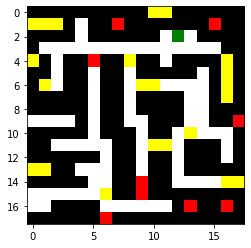

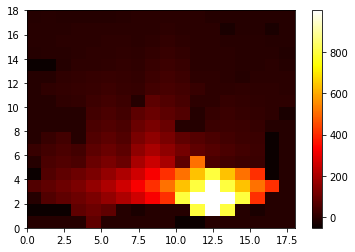

In [ ]:
# Test the Value_iteration  algorithm
env = MazeEnvironment()  # calling class MazeEnvironment
value_fun, policy=value_iteration(env, num_episodes=500) #Calling value_iteration algorithm

#Plot the value function
plt.pcolor(value_fun, cmap='hot')
plt.colorbar()
plt.show()



The color of each cell in the heatmap represents the value of that state, with hotter colors indicating higher values and cooler colors indicating lower values. This can give us an idea of which states have higher or lower values, and how they compare to each other. The colorbar on the right side of the plot shows the range of values represented by the colors in the heatmap.

In [ ]:

def plot_maze(maze, path=None):
    fig, ax = plt.subplots()
    for i in range(env.maze.shape[0]):
        for j in range(env.maze.shape[1]):
            if env.maze[i, j] == 0:
                color = 'black'
            elif env.maze[i, j] == 1:
                color = 'white'
            elif env.maze[i, j] == -5:
                color = 'red'
            elif env.maze[i, j] == -10:
                color = 'yellow'


            rect = patches.Rectangle((j, i), 1, 1, linewidth=1, edgecolor='k', facecolor=color)
            ax.add_patch(rect)
    if path is not None:
        for i in range(len(path) - 1):
            current_pos = path[i]
            next_pos = path[i + 1]
            x = (current_pos[1] + 0.5, next_pos[1] + 0.5)
            y = (maze.shape[0] - 0.5 - current_pos[0], maze.shape[0] - 0.5 - next_pos[0])
            ax.plot(x, y, 'r-', linewidth=2)
    ax.set_aspect('equal')
    ax.set_xlim((0, maze.shape[1]))
    ax.set_ylim((0, maze.shape[0]))
    ax.axis('off')
    plt.show()


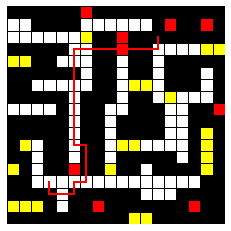

In [ ]:
# Get the optimal path using the policy
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

direction_codes = {"U": 0, "D": 1, "L": 2, "R": 3}
action_codes = {0: "U", 1: "D", 2: "L", 3: "R"}
# Assume you have already computed the optimal value function and policy using value iteration
# and have stored them in `V` and `policy`, respectively.

# Define the mapping from actions to arrows
arrow_map = {
    0: '↑',  # move up
    1: '→',  # move right
    2: '↓',  # move down
    3: '←',  # move left
}

start_state = (14, 3)
goal = (2, 12)
current_state = start_state
optimal_path = [current_state]
while current_state != goal:
    action = policy[current_state[0], current_state[1]]
    next_state, reward, done = env.step(action_codes[action], current_state)
    optimal_path.append(next_state)
    current_state = next_state

# Convert the optimal path to a list of tuples of coordinates
optimal_path_coords = [(state[0], state[1]) for state in optimal_path]

# Plot the maze with the optimal path
plot_maze(env.maze, path=optimal_path_coords)


The code above computes the optimal path from the start state to the goal state, given the computed optimal policy using value iteration. It then visualizes the maze with the optimal path highlighted in the plot.

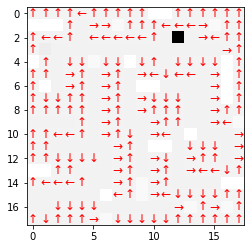

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume you have already computed the optimal value function and policy using value iteration
# and have stored them in `V` and `policy`, respectively.

# Define the mapping from actions to arrows
arrow_map = {
    0: '↑',  # move up
    1: '→',  # move right
    2: '↓',  # move down
    3: '←',  # move left
}

# Create a new figure
fig, ax = plt.subplots()

# Plot the maze as a 2D grid of squares
ax.imshow(env.maze, cmap='binary')

# Create a 2D grid of arrows representing the optimal policy
arrows = np.empty_like(env.maze, dtype=str)
for i in range(env.maze.shape[0]):
    for j in range(env.maze.shape[1]):
        if env.maze[i, j] == 0:  # if the cell is not a wall
            action = policy[i, j]
            arrow = arrow_map[action]
            arrows[i, j] = arrow
        else:
            arrows[i, j] = ''

# Overlay the arrows on top of the maze
for i in range(arrows.shape[0]):
    for j in range(arrows.shape[1]):
        ax.text(j, i, arrows[i, j], ha='center', va='center', fontsize=12, color='red')

# Show the plot
plt.show()


The arrows show the direction that the agent should move in from each state in order to reach the goal state with the highest possible reward.